# Classification and Regression Trees (CART)

<center><img src='https://github.com/muscak/Master-Machine-Learning-Algorithms/blob/master/Nonlinear-Algorithms/CART/decision-tree.png?raw=1' width='250' alt='Simple Decision Tree'></img></center>

Decision tree learning is a supervised learning approach used in statistics, data mining and machine learning. In this formalism, a classification or regression decision tree is used as a predictive model to draw conclusions about a set of observations.

Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees[[1]](https://en.wikipedia.org/wiki/Decision_tree_learning).



## Table of Contents

- [Introduction](#introduction)
- [Import Libraries](#libraries)
- [Load Sample Data](#sampledata)
- [Manual Implementation of CART](#manual)
- [Using Sklearn](#sklearn)
- [Conclusion](#conclusion)

## Introductions<a id='introduction'></a>

In this study, we'll impleted the CART on a manually generated dataset to see what are the steps in the decision process. We'll try to solve a classfication problem. Then we'll apply the `DecisionTreeClassifier` function from the `sklearn` library to the same dataset anc compare the results. 
Then we'll use the same function to solve a well-known iris plant classification problem. Finally we'll tune the hyper parameters of the functions to get better results.

## Import Libraries<a id='libraries'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_style('whitegrid')
sb.despine(offset=10, trim=True);

<Figure size 432x288 with 0 Axes>

## Load Sample Data<a id='sampledata'>

We'll create a dataframe which has 10 rows, 2 features and 1 label that has binary values.

In [2]:
x1 = [2.771244718, 1.728571309, 3.678319846, 3.961043357, 2.999208922, 7.497545867, 9.00220326, 7.444542326, 10.12493903, 
      6.642287351]
x2 = [1.784783929, 1.169761413, 2.81281357, 2.61995032, 2.209014212, 3.162953546, 3.339047188, 0.476683375, 3.234550982, 
      3.319983761]
y = [0, 0, 0, 0,0, 1, 1, 1, 1, 1]

df_train = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])

df_train

,x1,x2,y
0,2.771245,1.784784,0
1,1.728571,1.169761,0
2,3.678320,2.812814,0
3,3.961043,2.619950,0
4,2.999209,2.209014,0
5,7.497546,3.162954,1
6,9.002203,3.339047,1
7,7.444542,0.476683,1
8,10.124939,3.234551,1
9,6.642287,3.319984,1


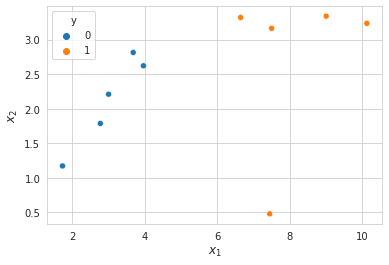

In [3]:
sb.scatterplot(data=df_train, x='x1', y='x2', hue='y')
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.show()

## Manual Implementation of CART<a id='manual'></a>

The CART model is learned by looking for split points in the data. A split point is a single value of a single attribute. Partitioning data at a split point involves separating all data at that node into two groups, left of the split point and right of the split point.


### Gini Index Cost Function
$$G = \sum\limits_{k=1}^{n}p_k \times (1-p_k)$$

Where $G$ is the Gini index over all classes, $p_k$ are the proportion of training instances with class $k$. A node that has all classes of the same type (perfect class purity) will have G = 0, where as a G that has a 50-50 split of classes for a binary classification problem (worst purity) will have a G = 0.5. Therefore, the **Gini Index** is **the most important component** for the performance of a classification and regression tree.

Different split points are tried and tested using a cost function then the split point which provides the lowest cost is selected.

In [4]:
# Function calculates teh Gini index and print it
def calculate_gini(df_train, split):
    df = df_train.copy()
    # Split the data to the right and left 
    df['Group'] = ''
    df.loc[df['x1'] < split, 'Group'] = 'LEFT'
    df.loc[df['x1'] >= split, 'Group'] = 'RIGHT'

    # Calculate class counts
    left_0 = len(df[(df['Group'] == 'LEFT') & (df['y'] == 0)])
    left_1 = len(df[(df['Group'] == 'LEFT') & (df['y'] == 1)])

    right_0 = len(df[(df['Group'] == 'RIGHT') & (df['y'] == 0)])
    right_1 = len(df[(df['Group'] == 'RIGHT') & (df['y'] == 1)])

    right = right_0 + right_1
    left = left_0 + left_1
    
    # print the counts to the screen
    print(pd.pivot_table(data=df.drop('x2', axis=1), index='y', columns='Group', aggfunc='count', 
               margins=True, margins_name='Sum', fill_value=0))
    
    # Calculate Gini Index
    g_left_0 = left_0 / left
    print('\nLeft 0: ', g_left_0)
    g_left_1 = left_1 / left
    print('Left 1: ', g_left_1)

    g_right_0 = right_0 / right
    print('Right 0: ', g_right_0)
    g_right_1 = right_1 / right
    print('Right 1: ', g_right_1)

    ## Calculating weights
    w_left = left / (left + right)
    print('\nWeight Left: ', w_left)
    w_right = right / (left + right)
    print('Weight Right: ', w_right)

    g_left = (1 - (np.square(g_left_0) + np.square(g_left_1))) * w_left
    print('\nGini LEFT: ', g_left)
    g_right = (1 - (np.square(g_right_0) + np.square(g_right_1))) * w_right
    print('Gini RIGHT: ', g_right)
    gini = g_left + g_right
    print('\n---------------------------')
    print('Gini: ', gini)

In [5]:
# In our study we'll use the first value of x1 as a first split point
split1 = df_train.loc[0, 'x1']
calculate_gini(df_train, split1)

        x1          
Group LEFT RIGHT Sum
y                   
0        1     4   5
1        0     5   5
Sum      1     9  10

Left 0:  1.0
Left 1:  0.0
Right 0:  0.4444444444444444
Right 1:  0.5555555555555556

Weight Left:  0.1
Weight Right:  0.9

Gini LEFT:  0.0
Gini RIGHT:  0.4444444444444444

---------------------------
Gini:  0.4444444444444444


In [37]:
# Let's try the value of the last x1 feature as a split point 
split2 = df_train['x1'].iloc[-1]
calculate_gini(df_train, split2)

        x1          
Group LEFT RIGHT Sum
y                   
0        5     0   5
1        0     5   5
Sum      5     5  10

Left 0:  1.0
Left 1:  0.0
Right 0:  0.0
Right 1:  1.0

Weight Left:  0.5
Weight Right:  0.5

Gini LEFT:  0.0
Gini RIGHT:  0.0

---------------------------
Gini:  0.0


### Create a test dataset

In [9]:
x1_test = [2.343875381, 3.536904049, 2.801395588, 3.656342926, 2.853194386, 8.907647835, 9.752464513, 
           8.016361622, 6.58490395, 7.142525173]
x2_test = [2.051757824, 3.032932531, 2.786327755, 2.581460765, 1.052331062, 3.730540859, 3.740754624, 
           3.013408249, 2.436333477, 3.650120799]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
df_test = pd.DataFrame(zip(x1_test, x2_test, y), columns=['x1', 'x2', 'y'])

### Make prediction on test dataset

In [8]:
# Function that predicts based on the given split value and returns the accuracy
def predict(df_test, split):
  df = df_test.copy()
  # Predicting by comparing the split value to the x1
  df['Prediction'] = ''
  df.loc[df['x1'] < split, 'Prediction'] = 0
  df.loc[df['x1'] >= split, 'Prediction'] = 1

  # Calculate the error
  df['Error'] = ''
  df.loc[df['Prediction'] == df['y'], 'Error'] = 0
  df.loc[df['Prediction'] != df['y'], 'Error'] = 1

  print(df)

  # Calculating the accuracy metric
  acc = (1 - (df['Error'].sum() / len(df['Error']))) * 100

  return acc


In [10]:
# We'll use the second split value as it has better class purity than the first split value
acc = predict(df_test, split2)

print('\n\n------------------------------------')
print('Accuracy: {:.0f}%'.format(acc))

         x1        x2  y Prediction Error
0  2.343875  2.051758  0          0     0
1  3.536904  3.032933  0          0     0
2  2.801396  2.786328  0          0     0
3  3.656343  2.581461  0          0     0
4  2.853194  1.052331  0          0     0
5  8.907648  3.730541  1          1     0
6  9.752465  3.740755  1          1     0
7  8.016362  3.013408  1          1     0
8  6.584904  2.436333  1          0     1
9  7.142525  3.650121  1          1     0


------------------------------------
Accuracy: 90%


In [11]:
# Let's see what would be the accuracy score if we used the first split option
acc = predict(df_test, split1)

print('\n\n------------------------------------')
print('Accuracy: {:.0f}%'.format(acc))

         x1        x2  y Prediction Error
0  2.343875  2.051758  0          0     0
1  3.536904  3.032933  0          1     1
2  2.801396  2.786328  0          1     1
3  3.656343  2.581461  0          1     1
4  2.853194  1.052331  0          1     1
5  8.907648  3.730541  1          1     0
6  9.752465  3.740755  1          1     0
7  8.016362  3.013408  1          1     0
8  6.584904  2.436333  1          1     0
9  7.142525  3.650121  1          1     0


------------------------------------
Accuracy: 60%


#### 🔎 Remark

As expected the accuracy score of the first split value (60%) is lower than the second one (90%). The first split value has Gini Index of 0.444 and the second has the Gini Index of 0.0 value which is the purist value. 

## Using Sklearn<a id='sklearn'></a>

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
model = DecisionTreeClassifier()
x = df_train.drop('y', axis=1)
y = df_train['y']
model.fit(x, y)

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[0] <= 5.302\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

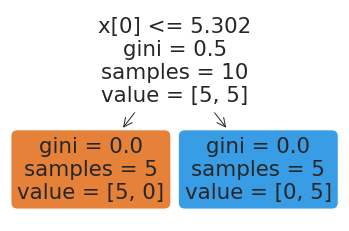

In [15]:
# Plot the tree structure after fitting on the training dataset
plot_tree(model, filled=True, rounded=True)

In [16]:
# Simpler text representation of the tree model
print(export_text(model, feature_names=list(x.columns)))

|--- x1 <= 5.30
|   |--- class: 0
|--- x1 >  5.30
|   |--- class: 1



In [17]:
# Make predictions using the test dataset
x_test = df_test.drop('y', axis=1)
y_hat = model.predict(x_test)

acc = accuracy_score(y_test, y_hat) * 100

print('Accuracy: {:.1f}%'.format(acc))

Accuracy: 100.0%


#### 🔎 Remark

The sklearn function provided a better accuracy score (100%) by finding/using split value of 5.302.

### Iris Dataset<a id='iris'></a>

We'll classify the flowers in Iris dataste using `DecisionTreeClassifier` from `sklearn` library.

In [18]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='Class', ylabel='count'>

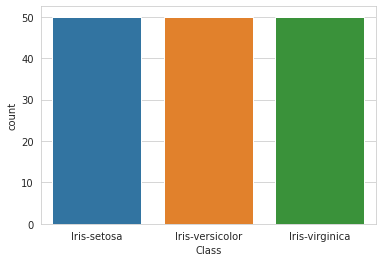

In [19]:
sb.countplot(x=dataset['Class'])

In [20]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### ⚠️ Important

CART does not require any special data preparation other than a good representation of the problem[[2]](https://machinelearningmastery.com/master-machine-learning-algorithms/). That's why we'll not check if any further modification is required for the data.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
dataset['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [23]:
# Mapping the text values of classes to numeric
dataset.replace({'Class':{'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}, inplace=True)

[Text(0.5, 0.9, 'petal-length <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [40, 38, 42]\nclass = Iris-virginica'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(0.5769230769230769, 0.7, 'petal-width <= 1.75\ngini = 0.499\nsamples = 80\nvalue = [0, 38, 42]\nclass = Iris-virginica'),
 Text(0.3076923076923077, 0.5, 'petal-length <= 4.95\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]\nclass = Iris-versicolor'),
 Text(0.15384615384615385, 0.3, 'petal-width <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = Iris-versicolor'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.46153846153846156, 0.3, 'petal-width <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = Iris-versicolor'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 2\nvalue

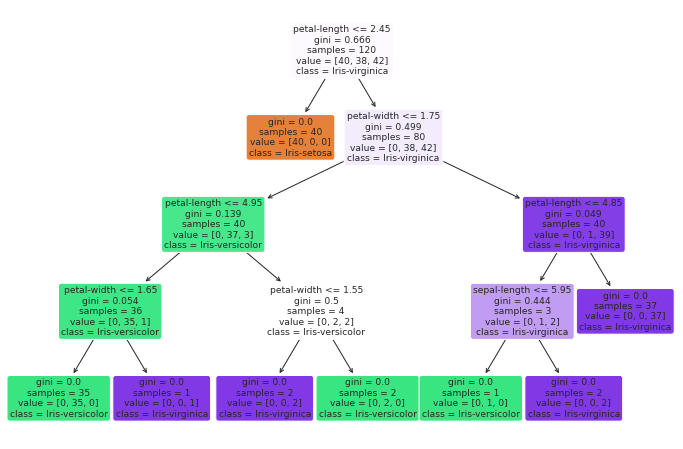

In [24]:
# Determining the features and label
x = dataset.drop('Class', axis=1)
y = dataset['Class']

# Splitting the dataset into train and test samples
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=101)

model = DecisionTreeClassifier()
# Trainin the model
model.fit(x_train, y_train)

# Displaying the created tree based on the training
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, rounded=True, feature_names=x.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

In [25]:
y_hat = model.predict(x_test)
acc = accuracy_score(y_test, y_hat) * 100
print('Accuracy score: {:.2f}%'.format(acc))

Accuracy score: 96.67%


### Hyperparameter Tuning

Now we'll try to increase the accuracy score by tuning the hyperparameters. To find the best combination of hyperparameters we'll use `GridSearch` with cross validation. This search function will run on the predefined hyper parameters dictionary.

In [26]:
# Printing the default hyperparameters of DecisionTreeClassifier
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Defining the hyperparameters to be used in grid search as a dictionary 
params = {
    'max_depth': [1, 2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

In [29]:
# Creating the model
model = DecisionTreeClassifier()

# Creating the grid search with 10 fold cross validation
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=10, scoring='accuracy', verbose=1)

In [39]:
%time
grid_search.fit(x_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [31]:
# Printing the hyperparameters that generates the best accuracy score
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=2)


In [38]:
# Printing the best training accuracy that can be generated among the available 
# hyper parameters in params dict
print('Accuracy: {:.2f}%'.format(grid_search.best_score_ * 100))

Accuracy: 95.83%


[Text(0.4, 0.8333333333333334, 'petal-width <= 0.75\ngini = 0.666\nsamples = 120\nvalue = [40, 38, 42]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(0.6, 0.5, 'petal-width <= 1.75\ngini = 0.499\nsamples = 80\nvalue = [0, 38, 42]\nclass = Iris-virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.139\nsamples = 40\nvalue = [0, 37, 3]\nclass = Iris-versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = Iris-virginica')]

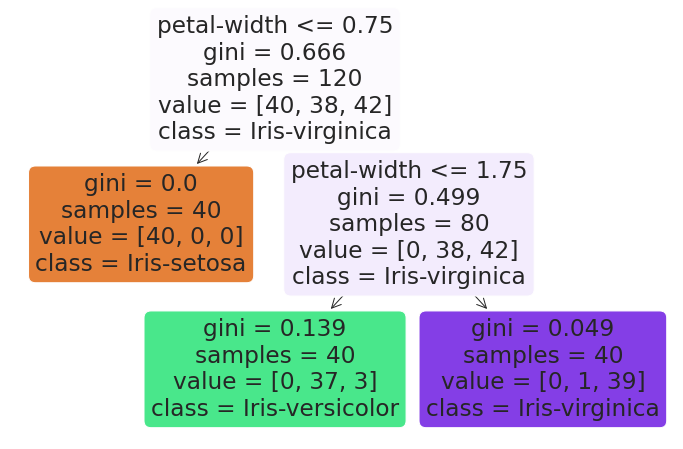

In [33]:
# Assigning hyperparameters that generates the best accuracy score to a new model to test the performance
#  on test dataset 
model_gs = grid_search.best_estimator_

# Training the model
model_gs.fit(x_train, y_train)

# Plotting the tree model
plt.figure(figsize=(12,8))
plot_tree(model_gs, filled=True, rounded=True, feature_names=x.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

In [34]:
# Predict with the trained model
y_hat = model_gs.predict(x_test)

acc = accuracy_score(y_test, y_hat) * 100
print('Acciracy: {:.2f}%'.format(acc))

Acciracy: 93.33%


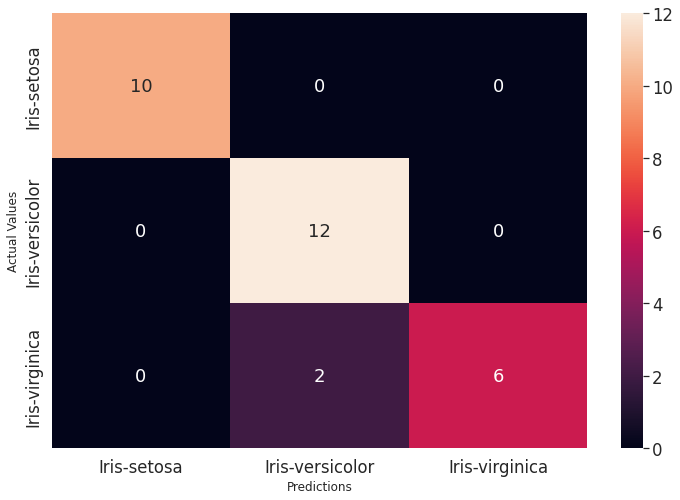

In [35]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_hat)
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
pred_labels = [l for l in labels]
cm_df = pd.DataFrame(cm, index=labels, columns=pred_labels)

sb.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sb.heatmap(cm_df, annot=True, fmt='d')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()

In [36]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      1.00      0.92        12
           2       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



#### 🔎 Remark

GridSearch generated 93% accuracy on the test dataset with the given params dictionary. That dictionary doesn't cover the entire parameter space that's why it generated a worse accuracy score than the model that has default hyperparameters which generated 96% accuracy score. GridSearch is a costly function. The hyperparameter space that we provided required 600 fits (5 options for `max_debth` x 6 options for `min_samples_leaf` x 2 for `criterion` x 10 fold = 600) and it's was completed in a couple of miliseconds. However, in real life scenarios we might be required to cover broader range of hyperparameter space which will cost a lot more than the current situation. In that case, the chance of achiving better accuracy score is very high.

## Conclusion<a id='conclusion'></a>

Tree models provide a visual tool for exploring the data, to gain an idea of what variables are important and how they relate to one another. Trees can capture nonlinear relationships among predictor variables. Tree models provide a set of rules that can be effectively communicated to nonspecialists, either for implementation or to “sell” a data mining project. When it comes to prediction, however, harnessing the results from multiple trees is typically more powerful than using just a single tree[[3]](https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/).
Decision trees are effective because they are easy to read, powerful even with messy data, and computationally cheap to deploy once after training but expensive to train. They carry a big risk of overfitting, and tend to find local optima because they can’t go back after they have made a split[[4]](https://everythingcomputerscience.com/books/Machine%20Learning%20for%20Humans.pdf).